# Anomaly Detection & Gaussian Models

Anomaly detection is an unsupervised learning technique that models the behavior of “normal” data and flags unusual examples that may indicate a problem. The core idea is to learn a probability model from a dataset of typical (unlabeled) events. When a new data point (e.g., a newly manufactured aircraft engine) is evaluated, the algorithm computes its probability under the learned model. If the probability is below a chosen threshold (denoted by $\epsilon$), the example is flagged as anomalous.

### Practical Example: Aircraft Engines
**Context:** Aircraft engine reliability is critical. Even a small number of defective engines can have severe consequences.

**Features:** Consider measurable features such as:
- $x_1$: Heat generated by the engine.
- $x_2$: Vibration intensity.

**Process:**  
1. **Training:** Collect $m$ examples (most of which are normal) and compute features.
2. **Modeling:** Learn the probability distribution $p(x)$ over these features.
3. **Testing:** For a new engine with feature vector $X_{\text{test}}$, compute $p(X_{\text{test}})$.  
    - If $p(X_{\text{test}}) < \epsilon$, flag as anomalous.
    - Otherwise, consider the engine normal.

This method generalizes to many domains, such as fraud detection, monitoring data centers, and quality control in manufacturing.

---

## Density Estimation with the Gaussian Distribution

The most common approach to anomaly detection is **density estimation**. By modeling the probability distribution of the training data, one can decide whether a new example fits within the “normal” regions.

### The Gaussian (Normal) Distribution

When $x$ is a random variable, a Gaussian distribution with mean $\mu$ and variance $\sigma^2$ is defined as:
  
$$p(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$
  
- **Mean ($\mu$):** The center of the distribution.
- **Standard Deviation ($\sigma$):** Determines the “width” or spread.
- **Variance ($\sigma^2$):** The square of the standard deviation.
  
- **Visual Analogy:** Think of the classic bell-shaped curve, similar to the outline of a traditional bell (or even the Liberty Bell, in a loose visual analogy). The peak of the bell is at $\mu$, and the curve’s width is determined by $\sigma$.

The probability density function (PDF) of the multivariate Gaussian distribution is:

$$
p(x) = \frac{1}{(2\pi)^{k/2} |\Sigma|^{1/2}} 
\exp \left(-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)
$$

where:

- $x$ is a $k$-dimensional vector (each row of $X$).
- $\mu$ is the mean vector.
- $\Sigma$ is the covariance matrix.
- $k$ is the number of dimensions (features).
- $|\Sigma|$ is the determinant of $\Sigma$.
- $\Sigma^{-1}$ is the inverse of $\Sigma$.

This generalizes the univariate Gaussian distribution to multiple dimensions.


### Effects of Changing Parameters

**Changing $\sigma$:**
- A smaller $\sigma$ (e.g., 0.5) results in a narrow, taller curve (because the area under the curve remains 1).
- A larger $\sigma$ (e.g., 2) results in a wider, shorter curve.

**Changing $\mu$:**
- Shifts the entire distribution left or right without affecting the shape.

### Estimating Parameters from Data

For a training set with $m$ examples:

**Mean Estimate:**
  
$$\mu = \frac{1}{m} \sum_{i=1}^{m} x^{(i)}$$
  
**Variance Estimate:**

$$\sigma^2 = \frac{1}{m} \sum_{i=1}^{m} \left(x^{(i)} - \mu\right)^2$$

These are the **maximum likelihood estimates** for the Gaussian parameters. (Some texts use $\frac{1}{m-1}$ for an unbiased estimate, but the difference is usually negligible in practice.)

---

## Multi-Feature Anomaly Detection

In real-world applications, each example is a vector of $n$ features. For instance, an aircraft engine might be characterized by more than just heat and vibration. The anomaly detection model assumes that each feature is independent, allowing us to write:

$$
p(x) = \prod_{j=1}^{n} p(x_j; \mu_j, \sigma_j^2)
$$

- **Interpretation:**  
  The probability of the entire feature vector is the product of the individual Gaussian probabilities for each feature.
- **Parameter Estimation:**  
  For each feature $x_j$, calculate its own $\mu_j$ and $\sigma_j^2$ using the same formulas as above.
- **Testing New Examples:**  
  For a new vector $x$, compute $p(x)$ by plugging in the values for each feature. If $p(x) < \epsilon$, the example is flagged as anomalous.

### Intuitive Example:
Imagine a scenario where:
- There is a 1/10 chance that an engine is unusually hot ($x_1$) and a 1/20 chance that it vibrates unusually hard ($x_2$).
- The joint probability (assuming independence) is $\frac{1}{10} \times \frac{1}{20} = \frac{1}{200}$, which is very low and would indicate a high likelihood of anomaly.

---

## Evaluating the Anomaly Detection System

### Using a Cross-Validation Set
While the training set consists of unlabeled data (assumed normal), a small number of labeled anomalies (positive examples, $y=1$) can be used in a cross-validation set to tune parameters like $\epsilon$.

**Dataset Splitting Example:**
- **Training Set:** 6,000 normal examples.
- **Cross-Validation Set:** 2,000 normal examples + 10 known anomalies.
- **Test Set:** Another 2,000 normal examples + 10 known anomalies.
  
**Evaluation Metrics:**
- Compute predictions using the rule:
- Predict $y=1$ (anomaly) if $p(x) < \epsilon$.
- Predict $y=0$ (normal) otherwise.
- Use metrics such as precision, recall, and $F_1$ score, especially since the dataset is highly imbalanced.

### Handling Skewed Data
Anomaly detection often involves very few positive examples relative to negatives. This imbalance means standard accuracy may not be the best measure. Instead, evaluate:
- **True Positive Rate (TPR)**
- **False Positive Rate (FPR)**
- **Precision and Recall**
- **$F_1$ Score**

The aim is to choose an $\epsilon$ that minimizes false alarms (flagging normal examples) while still catching anomalies.

---

## Anomaly Detection vs. Supervised Learning

### When to Use Anomaly Detection:
- **Few Positive Examples:** When there are very few anomalies (often 0–20 examples).
- **New/Unknown Anomalies:** When future anomalies might differ significantly from known cases.
- **Modeling Normal Behavior:** The model is built solely on normal data, flagging deviations.

### When to Use Supervised Learning:
- **Sufficient Labeled Data:** When there are enough examples of both normal and anomalous cases.
- **Predictable Patterns:** When future positive examples are expected to resemble the historical positive examples.
  
**Example:**  
- **Financial Fraud:** New types of fraud may be unpredictable, making anomaly detection a better fit.
- **Email Spam Detection:** Spam emails tend to share characteristics over time; supervised learning can be more effective.

---

## Feature Engineering for Anomaly Detection

Choosing the right features is crucial because anomaly detection algorithms work solely from the structure of normal data. Unlike supervised learning, they cannot “learn” which features to ignore from labeled examples.

### Making Features More Gaussian

Many anomaly detection models assume that the data follows a Gaussian distribution. If a feature's distribution is skewed, you can transform it:
- **Log Transformation:**  
  Replace $x$ with $\log(x)$ (add a small constant to avoid $\log(0)$). This can often transform a skewed distribution into one that is more symmetric.
  
- **Power Transformations:**  
  For example, using $x^{0.4}$ or $x^{1/2}$ can sometimes yield a distribution that is closer to Gaussian.
  
- **Practical Tip:**  
  Plot histograms of your raw and transformed features. Experiment with different transformations until the distribution appears symmetric (bell-shaped). Remember to apply the same transformation to the training, cross-validation, and test sets.

### Creating New Features

Sometimes a single feature may not reveal anomalies. You might need to combine features:
- **Example:**  
  In monitoring computers in a data center:
  - **Original Features:** CPU load, network traffic.
  - **New Feature:** The ratio of CPU load to network traffic, which might highlight anomalies that are not visible when looking at each feature individually.
  
This process of iterative feature tuning is essential for improving the anomaly detection system.

---

## Development Process Recap

1. **Feature Selection:**  
   Identify and engineer features that capture key aspects of normal behavior.
2. **Model Training:**  
   Estimate Gaussian parameters ($\mu_j$, $\sigma_j^2$) for each feature using normal data.
3. **Thresholding:**  
   Set a threshold $\epsilon$ such that if $p(x) < \epsilon$, flag the example as anomalous.
4. **Evaluation:**  
   Use a cross-validation set (with a few anomalies) to tune $\epsilon$ and assess performance with appropriate metrics.
5. **Error Analysis:**  
   Examine false negatives (missed anomalies) and false positives (normal examples flagged) to inspire new feature transformations or additional features.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
X_train = np.load('data/anomaly_detection_X.npy')
X_val = np.load('data/anomaly_detection_X_val.npy')
y_val = np.load('data/anomaly_detection_y_val.npy')

print(f"""
X_train.shape={X_train.shape}
X_val.shape={X_val.shape}
y_val.shape={y_val.shape}
""")


X_train.shape=(307, 2)
X_val.shape=(307, 2)
y_val.shape=(307,)



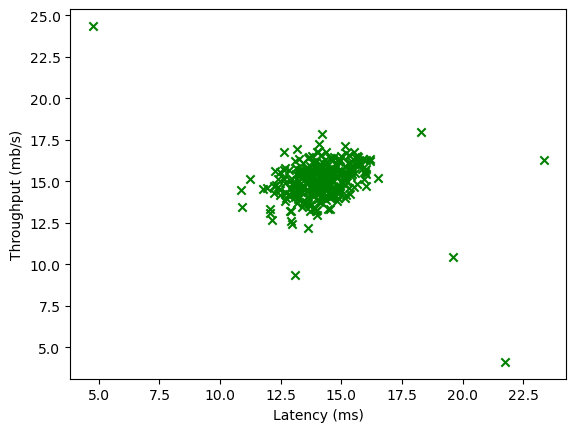

In [38]:
plt.scatter(X_train[:,0], X_train[:,1], marker='x', c='green')
plt.gca().set(xlabel="Latency (ms)", ylabel="Throughput (mb/s)");

In [39]:
def estimate_gaussian(X): 
    """
    Calculates mean and variance of all features in the dataset.
    """

    return X.mean(axis=0), X.var(axis=0)

In [40]:
estimate_gaussian(X_train)

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [62]:
def multivariate_gaussian(X):
    """
    Computes the probability density function (PDF) of X under the multivariate Gaussian distribution.
    
    Parameters:
        X (ndarray): A (m x n) matrix where each row is an example.

    Returns:
        p (ndarray): Probability density values for each example.
    """

    mu, var = estimate_gaussian(X)

    # Convert variance to covariance matrix if needed
    var = np.diagflat(var) if var.ndim == 1 else var

    # Compute constants
    k = len(mu)
    det_var = np.linalg.det(var)  # Determinant of covariance matrix
    inv_var = np.linalg.inv(var)  # Inverse covariance matrix

    # Compute exponent
    X_centered = X - mu
    exponent = -0.5 * np.sum(X_centered @ inv_var * X_centered, axis=1)

    # Compute probability density function
    coeff = (2 * np.pi) ** (-k / 2) * det_var ** (-0.5)
    p = coeff * np.exp(exponent)

    return p

In [63]:
import numpy as np

def select_threshold(y_val, p_val, num_steps=1000):
    """
    Finds the best threshold to use for selecting outliers based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    """ 

    best_epsilon, best_F1 = 0, 0

    for i, epsilon in enumerate(np.linspace(np.min(p_val), np.max(p_val), num_steps)):
        predictions = p_val < epsilon

        tp, fp, fn = (
            np.count_nonzero(y_val & predictions),
            np.count_nonzero(~y_val & predictions),
            np.count_nonzero(y_val & ~predictions)
        )

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Print results at most 10 times + 1
        if i % (num_steps // 10) == 0 or i == num_steps - 1:
            print(f"epsilon={epsilon}, F1={F1}")

        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon

    return best_epsilon, best_F1

In [64]:
p_val = multivariate_gaussian(X_val)
epsilon, F1 = select_threshold(y_val, p_val)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)

epsilon=1.8005213513023846e-30, F1=0
epsilon=0.007872603888756345, F1=0.7777777777777778
epsilon=0.01574520777751269, F1=0.6086956521739131
epsilon=0.023617811666269035, F1=0.42424242424242425
epsilon=0.03149041555502538, F1=0.25925925925925924
epsilon=0.039363019443781726, F1=0.1842105263157895
epsilon=0.04723562333253807, F1=0.125
epsilon=0.055108227221294416, F1=0.1103448275862069
epsilon=0.06298083111005076, F1=0.08648648648648649
epsilon=0.0708534349988071, F1=0.07258064516129033
epsilon=0.07864731284867589, F1=0.05714285714285715
Best epsilon found using cross-validation: 1.574521e-04
Best F1 on Cross Validation Set: 0.875000
